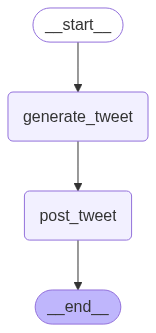

In [2]:
from langgraph.graph import StateGraph, START, END
from pydantic import BaseModel
from langchain.chat_models import init_chat_model
from dotenv import load_dotenv
from IPython.display import Image, display

import getpass
import os
import logging

# Configure logging
logging.basicConfig(
    level=logging.DEBUG,
    format="%(asctime)s - %(levelname)s - %(message)s",
    filename="tweet_agent.log",
)

load_dotenv()

# Initialise LLM 
if not os.environ.get("GOOGLE_API_KEY"):
  os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")
  
# Initialize the chat model with the Google Gemini API key
model = init_chat_model("gemini-2.5-pro", model_provider= "google_genai")

# response = model.invoke("Hello, how are you?")
# print(response)

# Class for passing state across nodes
class State(BaseModel):
    description : str
    body: str
    
## Functions for nodes

# Function to generate a tweet
def generate_tweet():
    """
    This Function will call llm to generate a tweet.
    """
    logging.debug("Generating tweet content using LLM")
   
# Function to post a tweet 
def post_tweet(tweetContent:str):
    """
    This Function will call tweeter api tool to post a tweet.
    """
    logging.debug(f"Posting tweet: {tweetContent}")

#function to build graph
def create_graph():
    #initialize the state graph    
    graph_builder = StateGraph(State)

    # Define the nodes in the graph
    graph_builder.add_node("generate_tweet", generate_tweet)
    graph_builder.add_node("post_tweet", post_tweet)

    # Define the edges in the graph
    graph_builder.add_edge(START, "generate_tweet")
    graph_builder.add_edge("generate_tweet", "post_tweet")
    graph_builder.add_edge("post_tweet", END)

    # Compile the graph
    graph = graph_builder.compile()
    display(Image(graph.get_graph().draw_mermaid_png()))    #not working in logs but visible in ipynb
    
create_graph()

